## Barplot- Data Visualization with Python

### Source of the Data: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### In this work, I have picked FORD used cars' in UK dataset, collected primarily from the above mentioned link and used Barplot to visualize data with Python to demonstrate different features of this dataset.

#### Importing file & reading

In [92]:
#importing necessary libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#reading the csv file using panda

df= pd.read_csv("ford.csv")

In [94]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


#### Basic informations about this dataset:
- Model: Different models of FORD brand
- Year: Year it was manufactured
- Price: Its buying price
- Transmission: Transmission type (Automatic, Manual or Semi-automatic)
- Mileage: Miles travelled by since it was bought
- Fueltype: Fuel it uses
- MPG: Fuel it costs (measured in gallon) per mile
- Enginesize: Its engine feature- volume of fuel and air that can be pushed through a car's cylinder

#### Checking number of unique values for different columns

In [95]:
#Checking Total Number of Unique Models presented in the data

total_models= len(df['model'].unique())

print("Total number of unique models data presented is : ", total_models )

Total number of unique models data presented is :  23


In [96]:
#Checking total number of years' presented in the data

total_years= len(df['year'].unique())

print("Total number of years' data presented is : ", total_years )

Total number of years' data presented is :  22


In [97]:
#Checking Total Number of Transmission Types presented in the data

total_transmission= len(df['transmission'].unique())

print("Total number of unique transmission types existing in the data is : ", total_transmission )

Total number of unique transmission types existing in the data is :  3


In [98]:
#Checking number of unique fueltype methods existing in the data

total_fuelType = len(df['fuelType'].value_counts())

print("Total number of fuelType present int the data: ", total_fuelType)

Total number of fuelType present int the data:  5


#### Creating function to determine percentage of different values under a specific feature

In [99]:
def percent_count_df(data, col):
    
    col_count = data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)
    col_count = col_count.reset_index()
    col_count = col_count.rename(columns= {'index':col, col: '% of Cars'} )
    col_count['% of Cars'] = col_count['% of Cars']*100
    col_count['% of Cars'] = col_count['% of Cars'].round(2)
    return col_count

In [100]:
fuelType_count = percent_count_df(df, 'fuelType')
transmission_count = percent_count_df(df, 'transmission')
model_count = percent_count_df(df, 'model')

In [101]:
year_count = percent_count_df(df, 'year')
year_count = year_count.sort_values(by='year')
#display(year_count.head())

#### Creating function for barplot

In [102]:
def barplot(data, x_column, y_column, color, yticks, rotation, palette):
    sns.barplot(x=x_column, y=y_column, data=data, color=color, palette=palette)
    plt.title("Percentage of cars with different " + x_column)
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)
    plt.xlabel(x_column)
    plt.ylabel("Percentage of Cars")

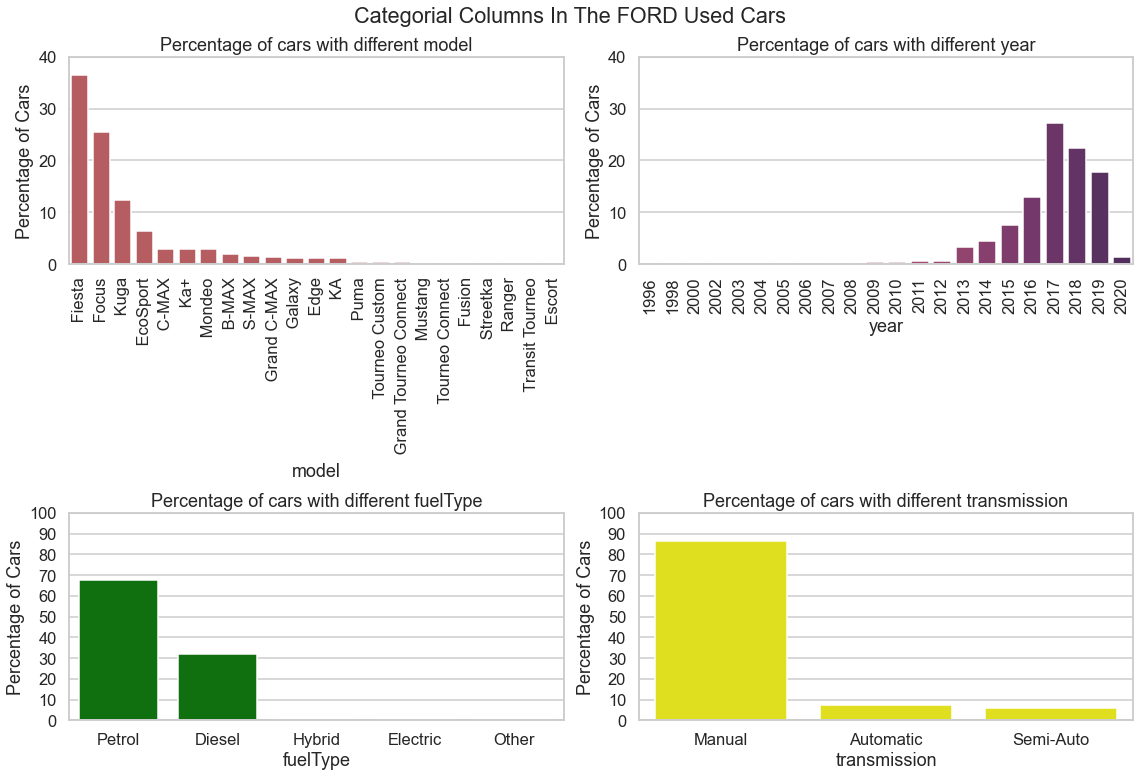

In [103]:
sns.set_context("talk")
plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
barplot(model_count, 'model', '% of Cars', 'r', np.arange(0,41,10), 90, None )


plt.subplot(2,2,4)
barplot(transmission_count, 'transmission', '% of Cars', 'yellow', np.arange(0,101,10), 0, None )


plt.subplot(2,2,3)
barplot(fuelType_count, 'fuelType', '% of Cars', 'green', np.arange(0,101,10), 0, None)

plt.subplot(2,2,2)
barplot(year_count, 'year', '% of Cars', 'blue', np.arange(0,41,10), 90, "flare")

plt.suptitle("Categorial Columns In The FORD Used Cars")
sns.set_theme(style="whitegrid")
plt.tight_layout()
plt.show()